In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data=pd.read_csv("diamonds.csv")
df=data.copy()
df

carat        cut color clarity  depth  table  price     x     y     z
0       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2       0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...
49995   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50
49996   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61
49997   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56
49998   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74
49999   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64

[50000 rows x 10 columns]

In [3]:
from summarytools import dfSummary
dfSummary(df)

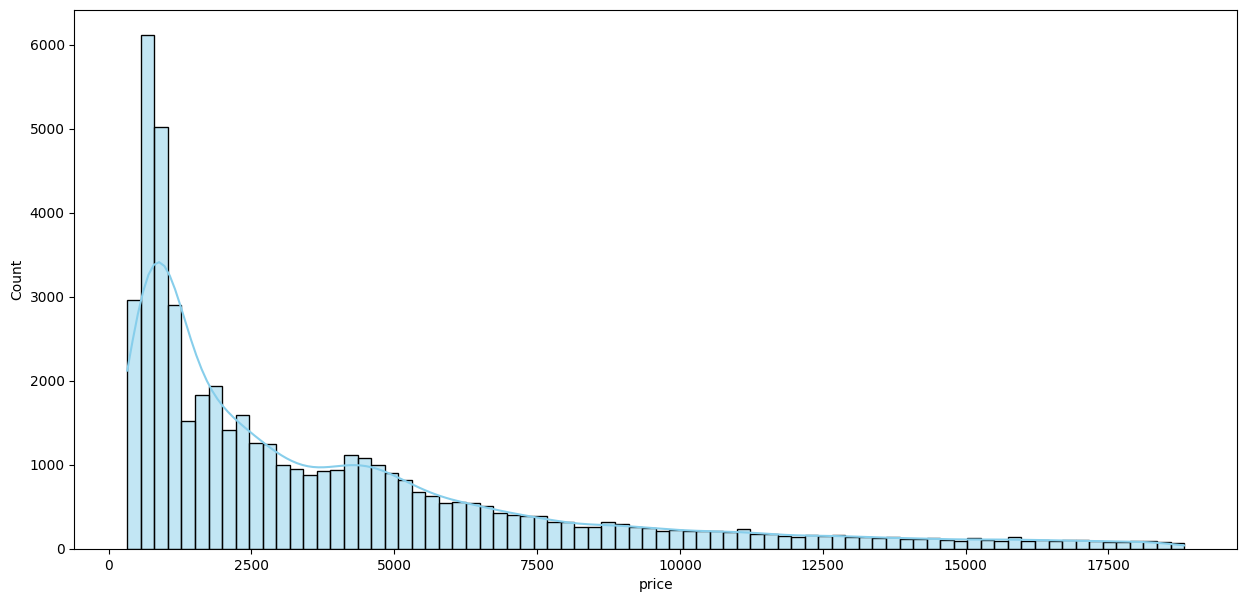

In [4]:
plt.figure(figsize=(15,7))
sns.histplot(df,x='price',kde=True,color='skyblue',multiple="stack")
plt.show()

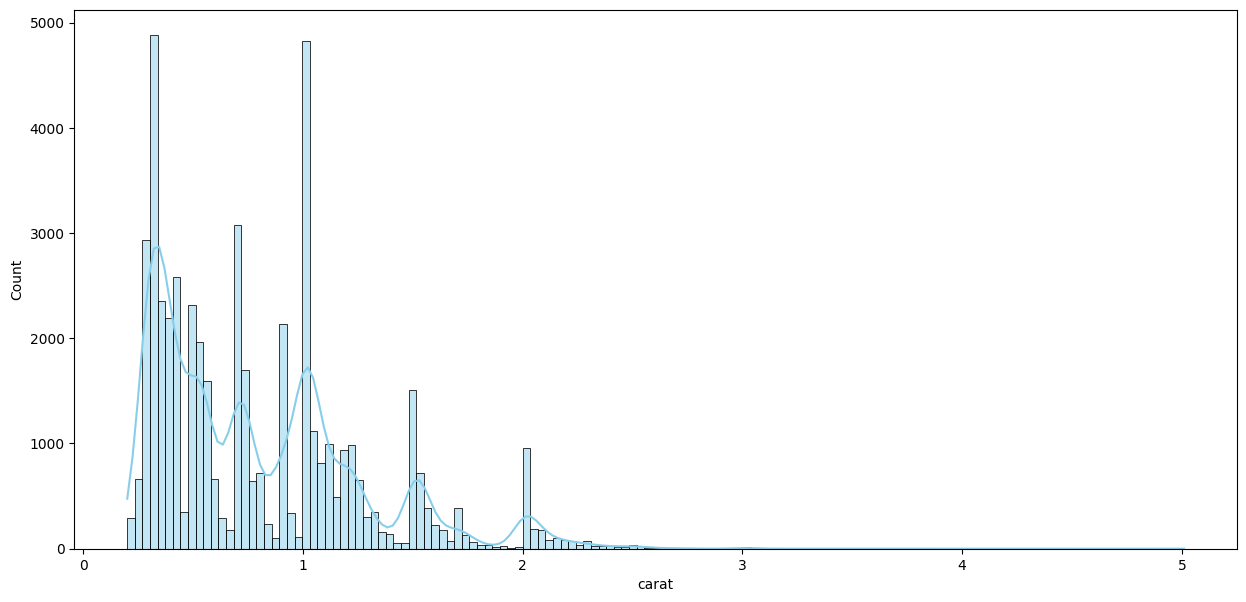

In [5]:
plt.figure(figsize=(15,7))
sns.histplot(df,x='carat',kde=True,color='skyblue',multiple="stack")
plt.show()

In [ ]:
plt.figure(figsize=(15,7))
sns.histplot(df,x='cut',hue='price',kde=True,color='skyblue',multiple="stack")
plt.show()

C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\distributions.py:267: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  baselines[cols] = curves[cols].shift(1, axis=1).fillna(0)
C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\distributions.py:267: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  baselines[cols] = curves[cols].shift(1, axis=1).fillna(0)


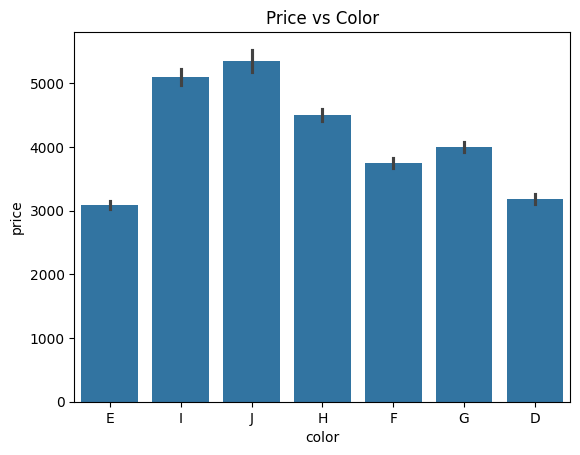

In [7]:
sns.barplot(x='color',y='price',data=df)
plt.title('Price vs Color')
plt.show()

<Axes: xlabel='cut', ylabel='price'>

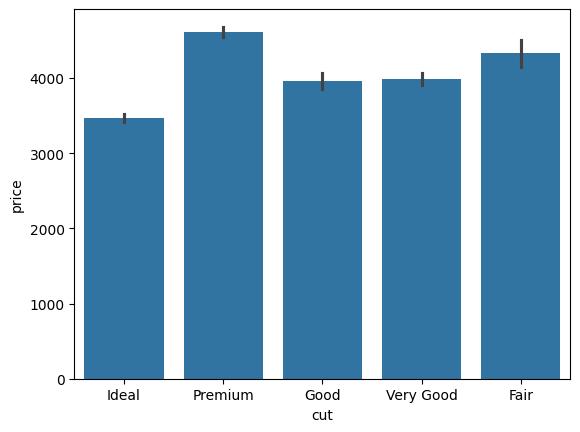

In [8]:
sns.barplot(x='cut',y='price',data=df)

<Axes: xlabel='clarity', ylabel='price'>

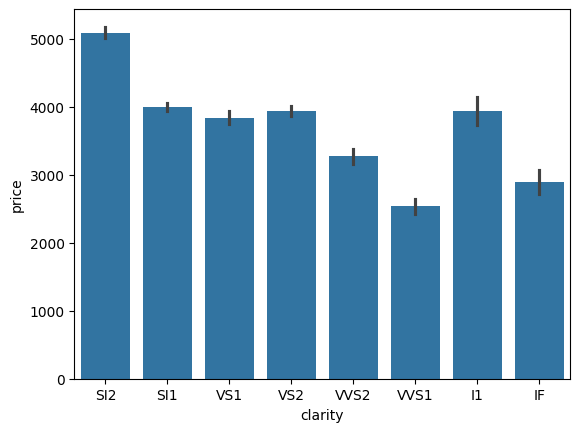

In [9]:
sns.barplot(x = 'clarity', y = 'price', data = df)

In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [15]:
df.cut=le.fit_transform(df.cut)
df.color=le.fit_transform(df.color)
df.clarity=le.fit_transform(df.clarity)

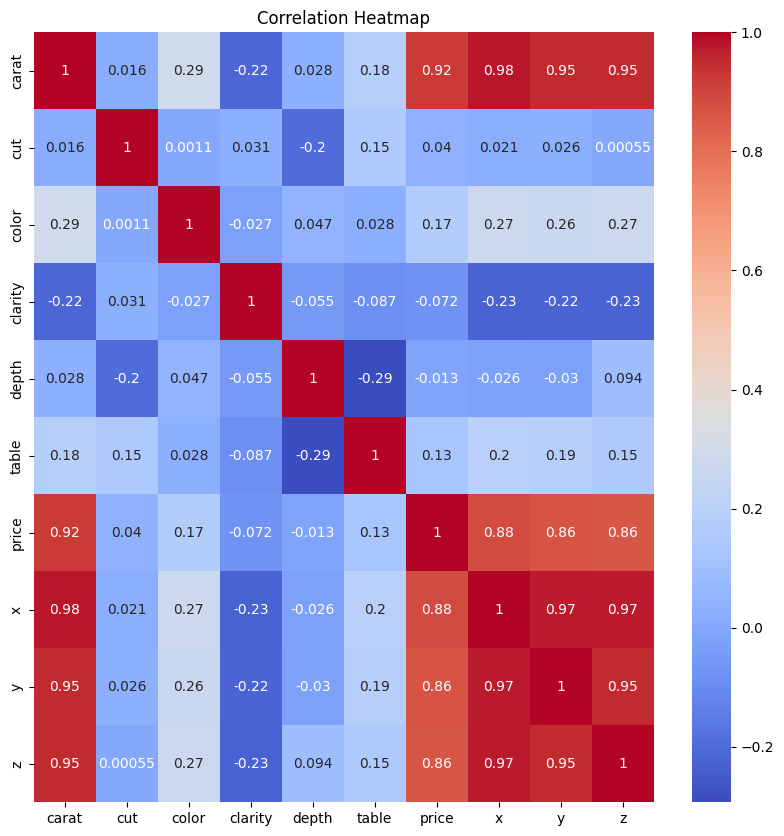

In [17]:
#plotting the correlation heatmap
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

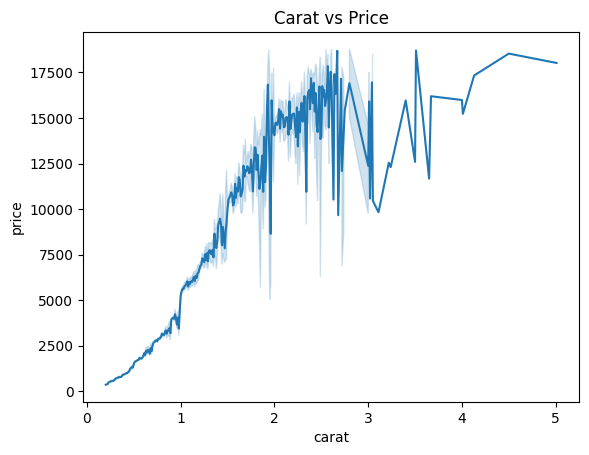

In [18]:
sns.lineplot(x='carat',y='price',data=df)
plt.title('Carat vs Price')
plt.show()

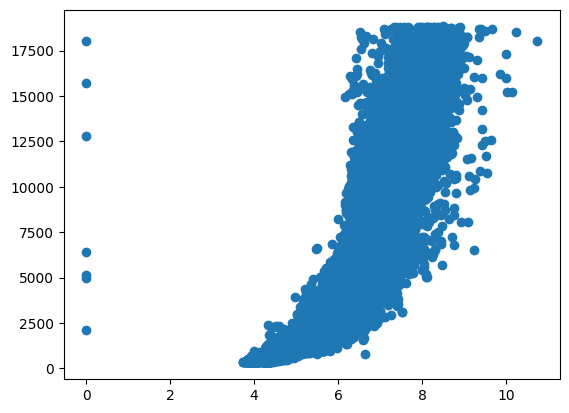

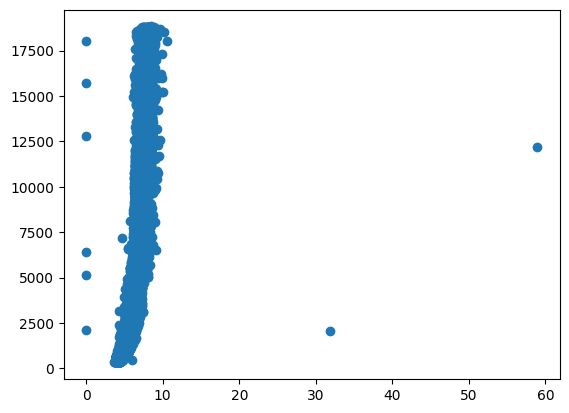

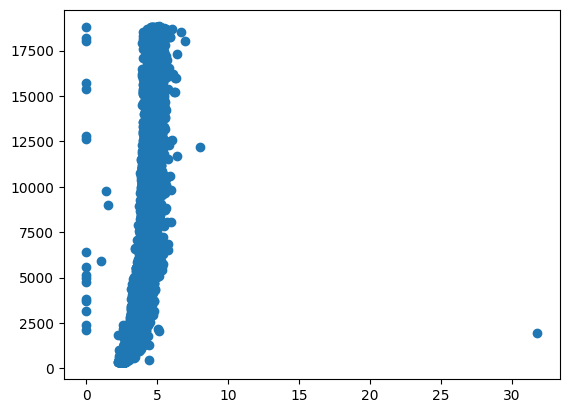

In [21]:
plt.scatter(df.x,df.price)
plt.show()
plt.scatter(df.y,df.price)
plt.show()
plt.scatter(df.z,df.price)

In [24]:
df=df[df['x']!=0]
df=df[df['y']!=0]
df=df[df['z']!=0]

In [27]:
df=df[df['x']<30]
df=df[df['y']<30]
df=df[df['z']<30]

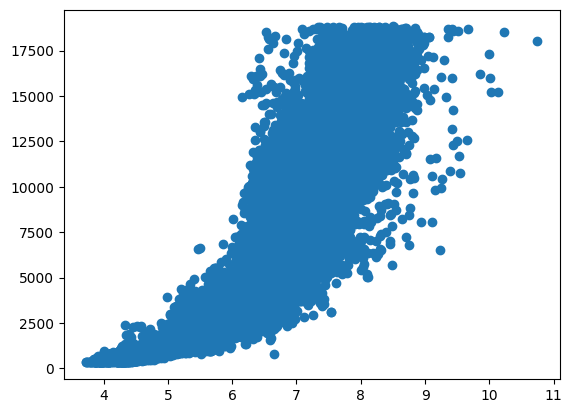

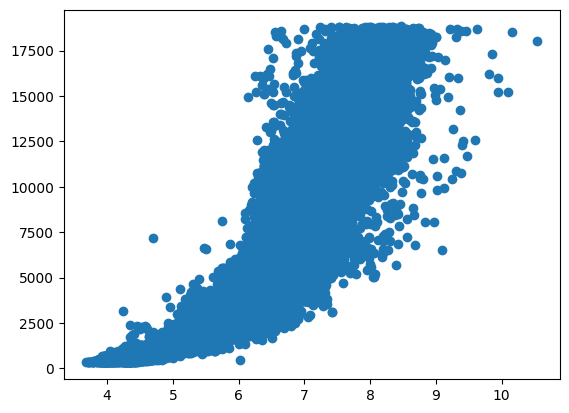

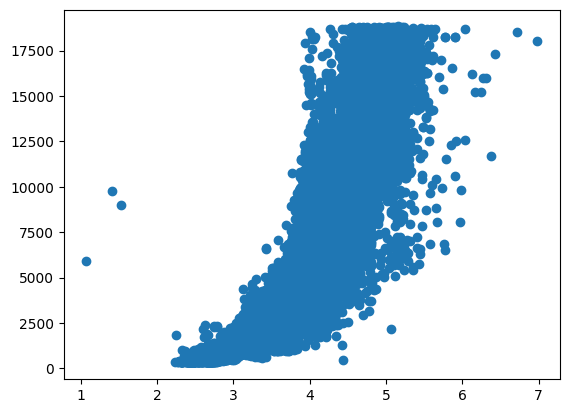

In [29]:
plt.scatter(df.x,df.price)
plt.show()
plt.scatter(df.y,df.price)
plt.show()
plt.scatter(df.z,df.price)

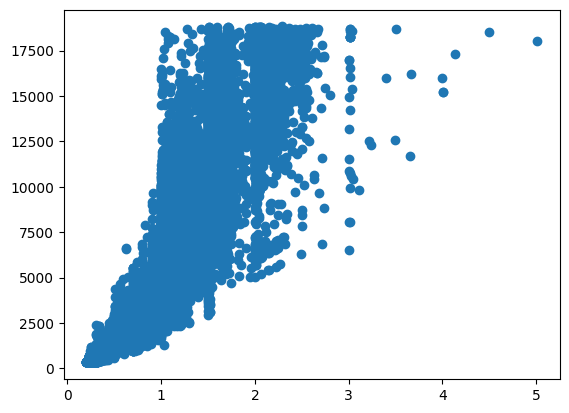

In [33]:
plt.scatter(df.carat,df.price)

In [108]:
from sklearn.model_selection import train_test_split
x=df.drop('price',axis=1)
y=df['price'].values.reshape(-1,1)
x_train,x_test,y_train,y_test  = train_test_split(x,y,test_size=0.25,random_state=2)

In [109]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt

DecisionTreeRegressor()

In [124]:

#training the model
dt.fit(x_train,y_train)
#train accuracy
dt.score(x_train,y_train)

0.9999976548591697

In [125]:
dt.score(x_test,y_test)


0.9658149357638718

In [112]:

#predicting the test set
dt_pred = dt.predict(x)

In [113]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf

RandomForestRegressor()

In [114]:

#training the model
rf.fit(x_train,y_train)
#train accuracy
rf.score(x_train,y_train)

C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


0.9999976337184502

In [115]:
rf.score(x_test,y_test)


0.9658142730317406

C:\Users\Asus\AppData\Local\Temp\ipykernel_9068\1213250168.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(y_test,hist=False,color='r',label='Actual Value')
C:\Users\Asus\AppData\Local\Temp\ipykernel_9068\1213250168.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(d

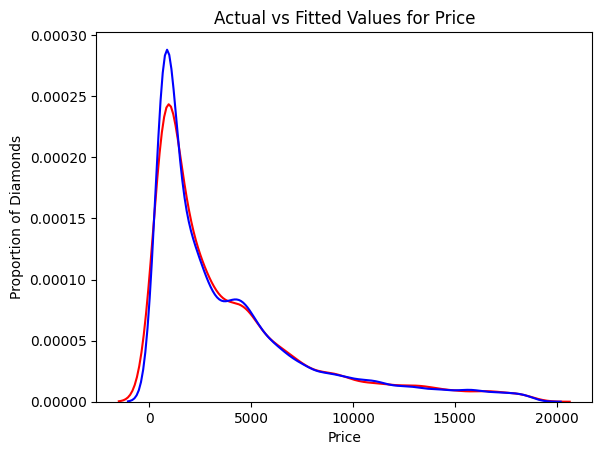

In [116]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
#distribution plot for actual and predicted values
ax = sns.distplot(y_test,hist=False,color='r',label='Actual Value')
sns.distplot(dt_pred,hist=False,color='b',label='Fitted Values',ax=ax)
plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price')
plt.ylabel('Proportion of Diamonds')
plt.show()

In [117]:
df['predict']=dt_pred

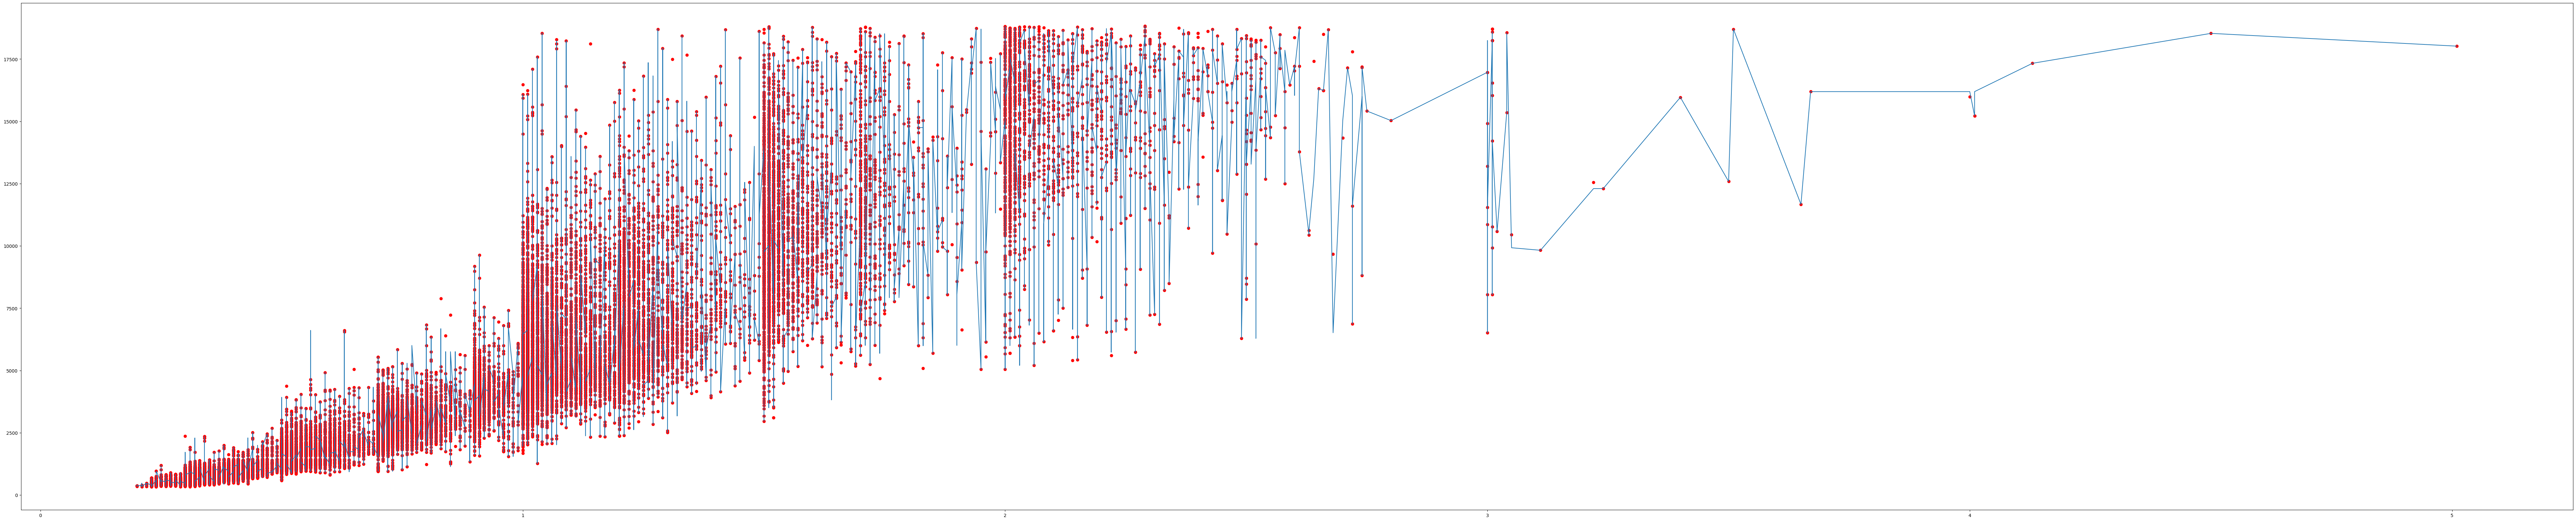

In [118]:
plt.figure(figsize=(100,20))
plt.scatter(df.sort_values(by='carat').carat,df.sort_values(by='carat').price,c='r')
plt.plot(df.sort_values(by='carat').carat,df.sort_values(by='carat').predict)


In [119]:
df

carat  cut  color  clarity  depth  table  price     x     y     z  \
0       0.23    2      1        3   61.5   55.0    326  3.95  3.98  2.43   
1       0.21    3      1        2   59.8   61.0    326  3.89  3.84  2.31   
2       0.23    1      1        4   56.9   65.0    327  4.05  4.07  2.31   
3       0.29    3      5        5   62.4   58.0    334  4.20  4.23  2.63   
4       0.31    1      6        3   63.3   58.0    335  4.34  4.35  2.75   
...      ...  ...    ...      ...    ...    ...    ...   ...   ...   ...   
49995   0.72    2      0        2   60.8   57.0   2757  5.75  5.76  3.50   
49996   0.72    1      0        2   63.1   55.0   2757  5.69  5.75  3.61   
49997   0.70    4      0        2   62.8   60.0   2757  5.66  5.68  3.56   
49998   0.86    3      4        3   61.0   58.0   2757  6.15  6.12  3.74   
49999   0.75    2      0        3   62.2   55.0   2757  5.83  5.87  3.64   

       predict  
0        586.0  
1        326.0  
2        327.0  
3        334.0  
4        372.0  
...        ...  
49995   2757.0  
49996   2757.0  
49997   2239.0  
49998   2802.0  
49999   2757.0  

[49980 rows x 11 columns]

In [120]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr

LinearRegression()

In [121]:

#training the model
lr.fit(x_train,y_train)
#train accuracy
lr.score(x_train,y_train)

0.9999976548591697

In [122]:
lr.score(x_test,y_test)


0.9658156745251434

In [141]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dense,Flatten

In [195]:
model = Sequential([

      # dense layer 1
    Dense(128, activation='relu'),

    # dense layer 2
    Dense(64, activation='relu'),
    
    Dense(32, activation='relu'),

      # output layer
    Dense(1, activation='relu'),
])

In [196]:
model.compile(optimizer='adam',
              loss='mse',
              metrics=['mean_absolute_error','mean_squared_error'])

In [197]:
history = model.fit(x_train, y_train, epochs=100,
          batch_size=2000,
          validation_split=0.2)

Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 23265376.0000 - mean_absolute_error: 3324.2437 - mean_squared_error: 23265376.0000 - val_loss: 3925081.0000 - val_mean_absolute_error: 1369.0360 - val_mean_squared_error: 3925081.0000
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1838379.5000 - mean_absolute_error: 826.3766 - mean_squared_error: 1838379.5000 - val_loss: 818596.9375 - val_mean_absolute_error: 665.5908 - val_mean_squared_error: 818596.9375
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 596851.9375 - mean_absolute_error: 545.5803 - mean_squared_error: 596851.9375 - val_loss: 25785.7520 - val_mean_absolute_error: 101.4860 - val_mean_squared_error: 25785.7520
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 63280.4844 - mean_absolute_error: 154.5251 - mean_squared_error: 63280.4844 - val_loss: 9301.1094 - val_mean_absolute_error: 63.2543 - val_mean_squared_error: 9301.1094
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - l

Text(0.5, 1.0, 'Train - MAE')

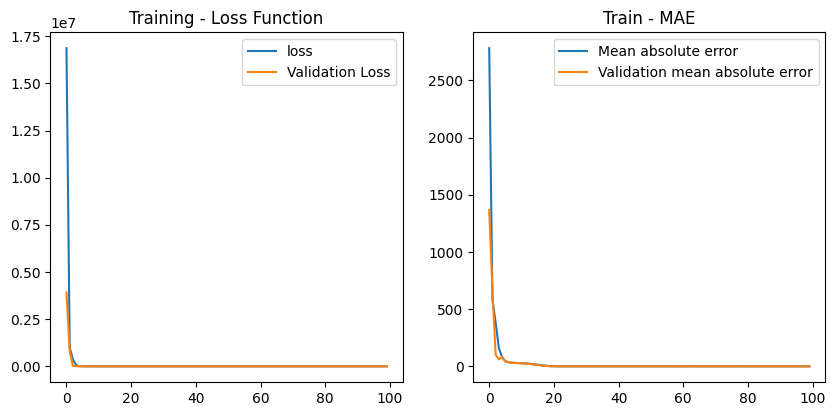

In [198]:
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training - Loss Function')

plt.subplot(2, 2, 2)
plt.plot(history.history['mean_absolute_error'], label='Mean absolute error')
plt.plot(history.history['val_mean_absolute_error'], label='Validation mean absolute error')
plt.legend()
plt.title('Train - MAE')

In [208]:
pred= model.predict(x).flatten()


1562/1562 ━━━━━━━━━━━━━━━━━━━━ 1s 902us/step


In [209]:
pred

array([ 586.8101 ,  329.7518 ,  331.88242, ..., 2239.3188 , 2801.7095 ,
       2756.345  ], dtype=float32)

In [211]:
df['nn_pred']=pred

In [212]:
df

carat  cut  color  clarity  depth  table  price     x     y     z  \
0       0.23    2      1        3   61.5   55.0    326  3.95  3.98  2.43   
1       0.21    3      1        2   59.8   61.0    326  3.89  3.84  2.31   
2       0.23    1      1        4   56.9   65.0    327  4.05  4.07  2.31   
3       0.29    3      5        5   62.4   58.0    334  4.20  4.23  2.63   
4       0.31    1      6        3   63.3   58.0    335  4.34  4.35  2.75   
...      ...  ...    ...      ...    ...    ...    ...   ...   ...   ...   
49995   0.72    2      0        2   60.8   57.0   2757  5.75  5.76  3.50   
49996   0.72    1      0        2   63.1   55.0   2757  5.69  5.75  3.61   
49997   0.70    4      0        2   62.8   60.0   2757  5.66  5.68  3.56   
49998   0.86    3      4        3   61.0   58.0   2757  6.15  6.12  3.74   
49999   0.75    2      0        3   62.2   55.0   2757  5.83  5.87  3.64   

       predict      nn_pred  
0        586.0   586.810120  
1        326.0   329.751801  
2        327.0   331.882416  
3        334.0   335.913757  
4        372.0   373.703094  
...        ...          ...  
49995   2757.0  2757.278809  
49996   2757.0  2756.597168  
49997   2239.0  2239.318848  
49998   2802.0  2801.709473  
49999   2757.0  2756.344971  

[49980 rows x 12 columns]

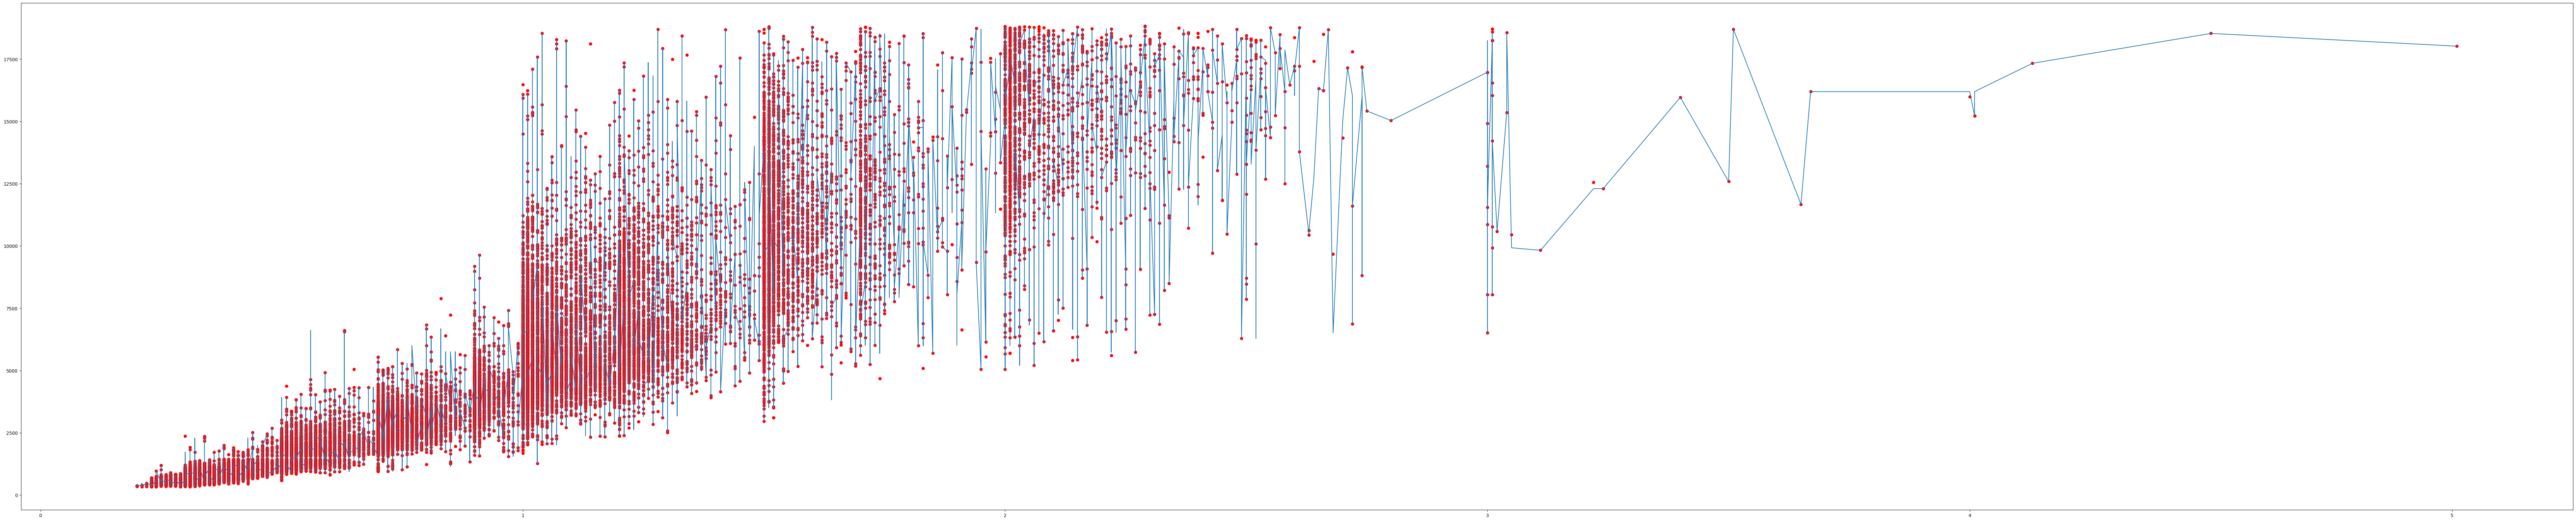

In [213]:
plt.figure(figsize=(100,20))
plt.scatter(df.sort_values(by='carat').carat,df.sort_values(by='carat').price,c='r')
plt.plot(df.sort_values(by='carat').carat,df.sort_values(by='carat').nn_pred)


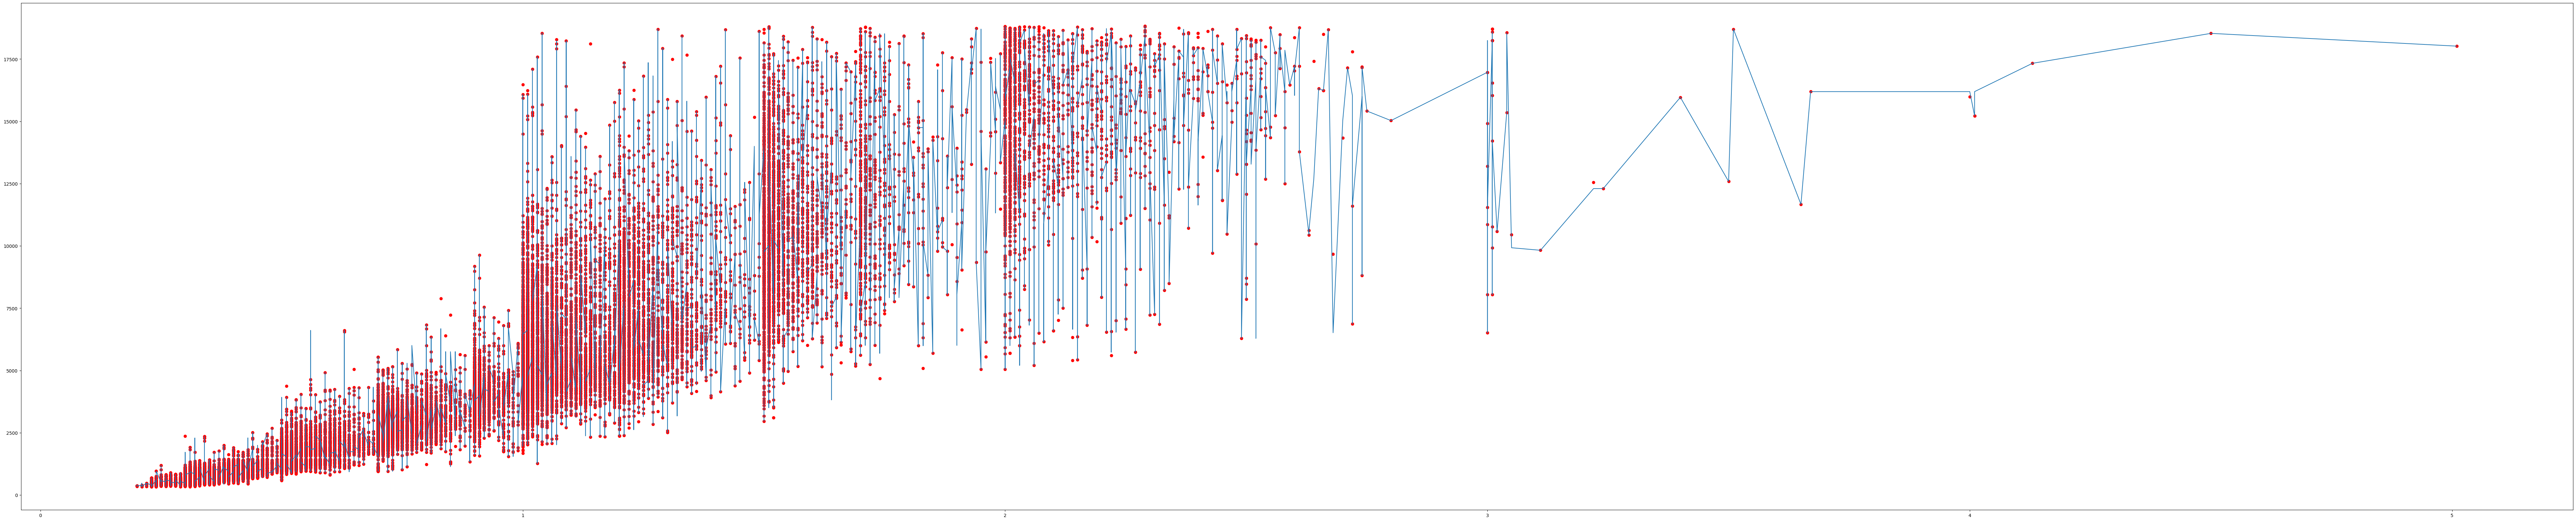

In [214]:
plt.figure(figsize=(100,20))
plt.scatter(df.sort_values(by='carat').carat,df.sort_values(by='carat').price,c='r')
plt.plot(df.sort_values(by='carat').carat,df.sort_values(by='carat').predict)


In [215]:
from sklearn.metrics import r2_score
r2_score(df.price,df.predict)

0.9913932168757694

In [216]:
r2_score(df.price,df.nn_pred)


0.9913917779922485

In [218]:
r2_score(y_test,model.predict(x_test).flatten())


391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 924us/step


0.9658100605010986